In [ ]:
!pip install torchvision

### Dataset documentation link::
https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html

In [ ]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
data = datasets.MNIST(root='data', download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.19MB/s]


In [ ]:
X = data.data
y = data.targets

print(X.shape)
print(y.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In X [no of samples, height, width]

In [ ]:
X_indices = (y == 6) | (y == 9)

X = X[X_indices]
y = y[X_indices]

y = torch.where(y == 9, 1, 0)

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([11867, 28, 28])
torch.Size([11867])


In [ ]:
torch.manual_seed(42)

In [ ]:
image_width = X.shape[2]
image_height = X.shape[1]

total_pixels = image_width * image_height
print(total_pixels)

784


tensor(1)


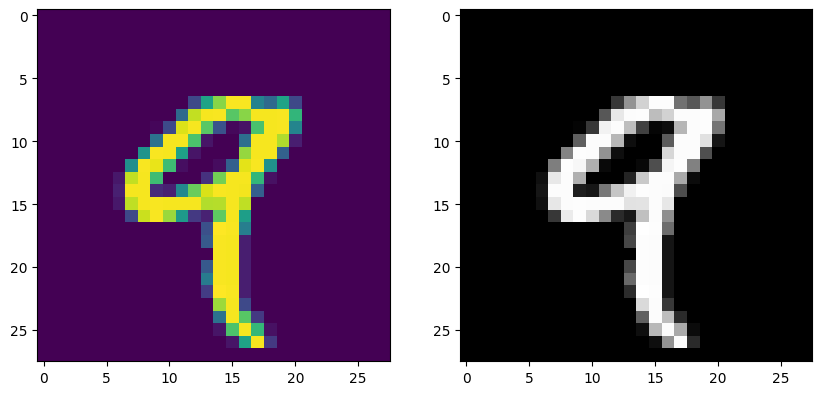

In [ ]:
from typing import ChainMap
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row and 2 columns

axes[0].imshow(X[0])
axes[1].imshow(X[0], cmap = 'gray')

print(y[0])

In [ ]:
print(X[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
indices = torch.randperm(X.shape[0])

X = X[indices]
y = y[indices]

In [ ]:
X = X.float() / 255.0
size = int (0.8 * X.shape[0])

X_train = X[:size]
y_train = y[:size]

X_test = X[size:]
y_test = y[size:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([9493, 28, 28]) torch.Size([9493])
torch.Size([2374, 28, 28]) torch.Size([2374])


In [ ]:
def initialize_w_b(input_dim):
  w = torch.randn((input_dim, 1), requires_grad=True) * 0.01
  b = torch.randn(1, requires_grad=True)

  return w, b

In [ ]:
def compare_grad(grad1, grad2):
  print(torch.max(torch.abs(grad1 - grad2)))

Need to do this broadcasting otherwise the gradient's shape won't match

In [ ]:
y_train.unsqueeze_(1)

tensor([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [1]])

In [ ]:
W,b = initialize_w_b(total_pixels)

X_train = X_train.view(-1, total_pixels)
X_test = X_test.view(-1, total_pixels)

lr = 0.05

loss_list = []

# print(X_train.shape, W.shape)
for i in range (50):
  Z = X_train @ W + b
  A = (1 + torch.exp(-Z))** (-1) # sigmoid
  L = -(y_train * torch.log(A) + (1 - y_train) * torch.log(1 - A)).mean() # binary_cross_entropy
  loss_list.append(L.item())
  # L.retain_grad()
  # A.retain_grad()
  # Z.retain_grad()
  # W.retain_grad()
  # b.retain_grad()

  # L.backward()
  # order matters

  dL_dA = (((1 - y_train)/ (1 - A)) - (y_train / A)) / X_train.shape[0]
  # dL_dZ = (1 + torch.exp(-Z))**(-2) * torch.exp(-Z) * dL_dA
  dL_dZ = A * (1 - A) * dL_dA
  dL_dW = X_train.T @ dL_dZ
  dL_db = dL_dZ.sum(dim = 0)

  # Updating the gradients
  with torch.no_grad():
    W -= lr * dL_dW
    b -= lr * dL_db

In [ ]:
print(loss_list)

[0.8103744387626648, 0.6815586686134338, 0.60612553358078, 0.5511248111724854, 0.5061046481132507, 0.4678100049495697, 0.4347689151763916, 0.40602508187294006, 0.38085058331489563, 0.35866421461105347, 0.3389952480792999, 0.3214598298072815, 0.30574366450309753, 0.2915879189968109, 0.2787783145904541, 0.26713645458221436, 0.2565128803253174, 0.24678198993206024, 0.2378372848033905, 0.229588121175766, 0.22195705771446228, 0.21487745642662048, 0.20829178392887115, 0.2021501213312149, 0.1964089274406433, 0.19103018939495087, 0.1859804093837738, 0.1812301129102707, 0.1767532229423523, 0.17252656817436218, 0.16852951049804688, 0.16474361717700958, 0.16115237772464752, 0.15774096548557281, 0.1544959545135498, 0.15140531957149506, 0.1484580636024475, 0.14564429223537445, 0.1429549902677536, 0.14038187265396118, 0.13791747391223907, 0.13555486500263214, 0.13328775763511658, 0.13111034035682678, 0.12901729345321655, 0.12700365483760834, 0.1250649243593216, 0.12319689989089966, 0.121395662426948

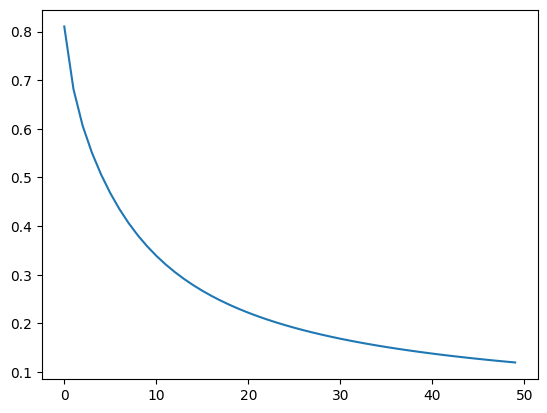

In [ ]:
plt.plot(loss_list)

In [ ]:
print(dL_dA.shape)

torch.Size([9493, 1])


In [ ]:
# print(dL_dZ.shape)
# print(Z.grad.shape)

In [ ]:
compare_grad(A.grad, dL_dA)
compare_grad(Z.grad, dL_dZ)
compare_grad(W.grad, dL_dW)
compare_grad(b.grad, dL_db)

tensor(1.4552e-11, grad_fn=<MaxBackward1>)
tensor(1.8190e-11, grad_fn=<MaxBackward1>)
tensor(2.2352e-08, grad_fn=<MaxBackward1>)
tensor(3.7253e-09, grad_fn=<MaxBackward1>)


In [ ]:
torch.allclose(A.grad, dL_dA)
torch.allclose(Z.grad, dL_dZ)
torch.allclose(W.grad, dL_dW)
torch.allclose(b.grad, dL_db)

True

Inference

In [ ]:
print(X_test.shape)
print(W.shape)

torch.Size([2374, 784])
torch.Size([784, 1])


In [ ]:
W,b

(tensor([[-6.1529e-03],
         [-1.1700e-02],
         [ 6.1658e-03],
         [-8.4962e-03],
         [ 1.2598e-02],
         [-1.7344e-02],
         [ 7.3556e-05],
         [ 2.1890e-02],
         [ 2.2328e-02],
         [ 1.1522e-03],
         [ 1.3865e-02],
         [-8.8046e-03],
         [ 6.5872e-04],
         [-2.0878e-02],
         [ 8.2699e-03],
         [-8.6339e-03],
         [-2.7590e-02],
         [-9.7523e-03],
         [-1.3694e-03],
         [ 7.5070e-03],
         [ 2.0640e-03],
         [-1.2229e-02],
         [ 4.0769e-03],
         [-7.4568e-03],
         [ 1.0521e-02],
         [-1.5621e-02],
         [-2.0922e-03],
         [-1.4206e-02],
         [-4.7286e-03],
         [ 1.3713e-03],
         [ 5.2000e-03],
         [-1.6814e-02],
         [ 1.1052e-03],
         [ 9.6875e-03],
         [-1.2389e-02],
         [ 1.6133e-02],
         [-1.4641e-02],
         [ 8.7463e-03],
         [ 5.3538e-03],
         [ 1.3179e-02],
         [-1.0506e-02],
         [ 2.683

In [ ]:
y_predictions = X_test @ W + b
sig_Y_predictions = ((1 + torch.exp(-y_predictions))** (-1)).squeeze()

threshold = 0.5

final_preds = torch.where(sig_Y_predictions > threshold, 1, 0)

# print(final_preds)
# print(y_test)

true_positive = torch.sum((final_preds == 1) & (y_test == 1))
true_negative = torch.sum((final_preds == 0) & (y_test == 0))
false_positive = torch.sum((final_preds == 1) & (y_test == 0))
false_negative = torch.sum((final_preds == 0) & (y_test == 1))

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy :: ",accuracy)
print("Precision :: ",precision)
print("Recall :: ",recall)
print("F1 score :: ",f1_score)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, final_preds))

Accuracy ::  tensor(0.9937)
Precision ::  tensor(0.9991)
Recall ::  tensor(0.9881)
F1 score ::  tensor(0.9936)
[[1195    1]
 [  14 1164]]


In [ ]:
y_test[:30],final_preds[:30]

(tensor([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
         1, 0, 1, 1, 0, 0]),
 tensor([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
         1, 0, 1, 1, 0, 0]))